<a href="https://colab.research.google.com/github/a-singh03/BDDA/blob/main/BDDA_Project2_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BDDA PROJECT 2**

Submitted By:

Ankita Singh - 035011

Anmol Bhardwaj - 035012

Shruti Tiwari - 035052

**Objective: To perform data pre-processing and Pipelining with PCA and xgboost.**

**Kaggle:** https://www.kaggle.com/code/ksavleen/xgboost-gpu-passenger-satisfaction-level

**Importing Libraries**

In [ ]:
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install 'scikit-optimize[plots]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
from xgboost.sklearn import XGBClassifier

In [ ]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Decision Trees
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import itertools

#Libraries for HyperParameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Libraries for Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import plotly.graph_objects as go

import joblib  #python package to store entire logic of a variable in python


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Reading Data**

In [ ]:
data = pd.read_csv('/Users/ravindratiwari/Downloads/archive (1)/train.csv')

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.shape

(103904, 25)

In [ ]:
print("The dataset columns are: ")
print(data.columns)
print(f"\nThe datatypes are : {data.dtypes}")
print(f"\nThe size of Training dataset is: {data.shape}")

The dataset columns are: 
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

The datatypes are : Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int

In [ ]:
data["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

**Mapping the categorical target**

In [ ]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied':1})

In [ ]:
#Keeping relevant features in the dataframe
df_feat = data.iloc[0:, 2:data.shape[1]-1]  #dropping 'Unnamed: 0', 'id',satisfaction
#df.shape[1] : number of columns in dataframe and 2: df.shape[1][-1] :: All columns from col with 2nd index upto last column
print(f"Features for training data are: {df_feat.columns}")


Features for training data are: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:
y = data.pop('satisfaction')

**Splitting the data into Training and Testing dataset**

In [ ]:
#Splitting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(df_feat,y,
                                                   test_size = 0.1,
                                                   random_state = 41)
#we can consider entire data as training data instead of splitting as we have seperate test data

print(f"Shape of Input Training Dataset: {x_train.shape}")
print(f"Shape of Input Test Dataset: {x_test.shape}")
print(f"Shape of Target Training Dataset: {y_train.shape}")
print(f"Shape of Target Test Dataset: {y_test.shape}")

Shape of Input Training Dataset: (93513, 22)
Shape of Input Test Dataset: (10391, 22)
Shape of Target Training Dataset: (93513,)
Shape of Target Test Dataset: (10391,)


In [ ]:
#Seperating the categorical and numerical data
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']

categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class',]
numerical_features = [feature for feature in features if feature not in categorical_features]

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ])


In [ ]:
# Bundle preprocessing and modeling code in a pipeline
clf_xg = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca', PCA()),
    ('classifier',XGBClassifier() ) # Define model
])

**Fitting the data**

In [ ]:
# Preprocessing of training data, fit model
clf_xg.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment'...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

**Score**

In [ ]:
clf_score = clf_xg.score(x_test,y_test)*100
print(f"The score of the XGB Classifier model is: {clf_score:0.3f}")

The score of the XGB Classifier model is: 94.447


In [ ]:
# Preprocessing of validation data, get predictions
y_preds = clf_xg.predict(x_test)


In [ ]:
#Hyperparameter grid Tuning

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'classifier__n_estimators' : [200,300],  #number of decision trees in random forest
    'classifier__learning_rate' : [0.1,0.2],
    'classifier__max_depth' : [4,6],
    'pca__n_components' : [20,25]
}

In [ ]:
grid_search_xg = GridSearchCV(clf_xg, param_grid, cv = 2, verbose = 1, n_jobs=-1)


**Fitting the data**

In [ ]:
grid_search_xg.fit(x_train, y_train)


Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'Online '
                                                                          'booking',
                                                                          'Gate '
                                                                          'location',
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Onlin...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [4, 6],
                         'classifier__n_estimators': [200, 300],
                         'pca__n_components': [20, 25],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=1)

In [ ]:
xg_score = grid_search_xg.score(x_test,y_test)*100
print(f"The score of the XGB Classifier After Hyperparameter tuning is: {xg_score:0.3f}")
#print(f"Best Score: {grid_search.best_score_}")
print(f"Best Parameters: {grid_search_xg.best_params_}")


The score of the XGB Classifier After Hyperparameter tuning is: 95.063
Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'pca__n_components': 25, 'preprocessor__num__imputer__strategy': 'median'}


In [ ]:
y_pred = clf_xg.predict(x_test)
print("--Few predictions--\n")
y_pred[:4]

--Few predictions--



array([0, 0, 0, 0])

**Accuracy Score**

In [ ]:
print("\n\n--Accuracy Score--\n")
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0



--Accuracy Score--



94.44711769800789

In [ ]:
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Confusion Matrix--



array([[5720,  220],
       [ 357, 4094]])

In [ ]:
best_model_ = grid_search_xg.best_estimator_

print(grid_search_xg.best_score_)
print(grid_search_xg.best_params_)

0.9432913136027556
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'pca__n_components': 25, 'preprocessor__num__imputer__strategy': 'median'}


**Feature Importance**

In [ ]:
print("\n\n--How many features--\n")
grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_



--How many features--



(25,)



---Feature importances---



array([0.24664679, 0.07809009, 0.0255158 , 0.01355266, 0.17616089,
       0.04997559, 0.03974556, 0.01535095, 0.01367863, 0.01545579,
       0.0095366 , 0.01145919, 0.02159911, 0.02100336, 0.02185493,
       0.02020812, 0.01656156, 0.02948037, 0.03183692, 0.01547834,
       0.08172509, 0.02288987, 0.00978441, 0.00582366, 0.00658572],
      dtype=float32)

In [ ]:
# Map feature importance values to original columns
original_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
importance_per_column = {}
feature_importances = grid_search_xg.best_estimator_.named_steps["classifier"].feature_importances_

for original_col in original_columns:
    related_cols = [col for col in x_train.columns if original_col in col]
    total_importance = sum(feature_importances[x_train.columns.get_loc(col)] for col in related_cols)
    num_related_cols = len(related_cols)
    average_importance = total_importance / num_related_cols
    importance_per_column[original_col] = average_importance

remaining_cols = [col for col in x_train.columns if col not in original_columns]
remaining_importance = [feature_importances[x_train.columns.get_loc(col)] for col in remaining_cols]

# Print the aggregated importance values for original columns
for col, importance in importance_per_column.items():
    print(f"{col}: {importance}")

# Print the importance values for the remaining columns
for col, importance in zip(remaining_cols, remaining_importance):
    print(f"{col}: {importance}")


Gender: 0.24664679169654846
Customer Type: 0.07809008657932281
Type of Travel: 0.013552664779126644
Class: 0.17616088688373566
Age: 0.02551579847931862
Flight Distance: 0.04997558891773224
Inflight wifi service: 0.03974556177854538
Departure/Arrival time convenient: 0.015350954607129097
Ease of Online booking: 0.01367863453924656
Gate location: 0.015455788932740688
Food and drink: 0.00953659601509571
Online boarding: 0.01145919132977724
Seat comfort: 0.02159911021590233
Inflight entertainment: 0.021003358066082
On-board service: 0.021854931488633156
Leg room service: 0.020208124071359634
Baggage handling: 0.016561564058065414
Checkin service: 0.02948037162423134
Inflight service: 0.031836915761232376
Cleanliness: 0.0154783446341753
Departure Delay in Minutes: 0.0817250907421112
Arrival Delay in Minutes: 0.022889869287610054


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 11.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


**Plotting the ROC Curve**

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

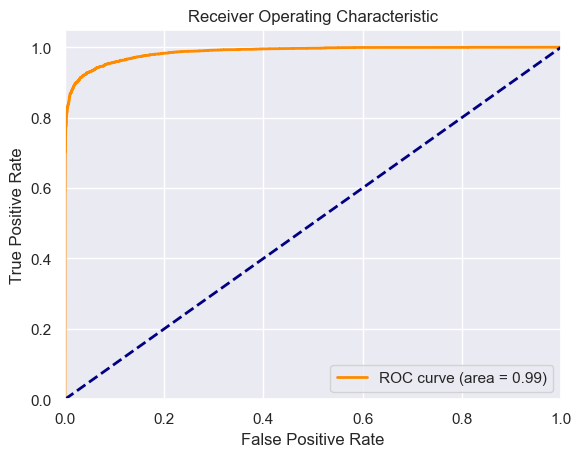

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Assuming y_test and y_pred_prob are your test labels and predicted probabilities respectively
y_pred_prob = clf_xg.predict_proba(x_test)[:, 1]  # Assuming you're interested in the positive class probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()